# Data loading


In [2]:
import pandas as pd
dataframe = pd.read_csv('/kaggle/input/suicide-watch/Suicide_Detection.csv',usecols = ['text','class'])
dataframe.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [3]:
suicide = dataframe[dataframe['class']=='suicide']
non_suicide = dataframe[dataframe['class']== 'non-suicide']
suicide = suicide.head(60000)
non_suicide = non_suicide.head(60000)
dataframe = pd.concat([suicide,non_suicide])

In [5]:
dataframe = dataframe.sample(frac = 1)
dataframe.head(10)

,text,class
27518,ayo anyone down to call on discord rn I’m cop...,non-suicide
74575,"What's the point?My family is abusive, my frie...",suicide
10431,If everything goes well I’ll be home soon! I’v...,non-suicide
41122,Getting nudes is awesome Nothing else here I j...,non-suicide
67951,I’m extremely disappointed 😔 I made [this post...,non-suicide
85151,Is anyone else's YouTube reccomended FUBAR rig...,non-suicide
54417,"To any hitmen hereMake my day. I'm all yours, ...",suicide
48213,what are my optionsAlmost 20 years in and out ...,suicide
68525,Wjhy does. society want me tostick to the 2020...,non-suicide
79309,told my best friend of my plans.You can see my...,suicide


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120000 entries, 27518 to 95164
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    120000 non-null  object
 1   class   120000 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [7]:
dataframe.isnull().sum()

text     0
class    0
dtype: int64

In [8]:
dataframe['class'].value_counts()

non-suicide    60000
suicide        60000
Name: class, dtype: int64

In [9]:
dataframe.shape

(120000, 2)

# preprocessing

In [11]:
# !pip install text_hammer 
# import text_hammer as th

  Using cached beautifulsoup4-4.9.1-py3-none-any.whl (115 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.11.1
ERROR: Cannot uninstall beautifulsoup4 4.11.1, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps beautifulsoup4==4.11.1'.


In [12]:
# %%time
# from tqdm._tqdm_notebook import tqdm_notebook
# tqdm_notebook.pandas()
# def text_preprocessing(df,col_name):
#     column = col_name
#     df[column] = df[column].progress_apply(lambda x:str(x).lower())
# #     df[column] = df[column].progress_apply(lambda x: th.cont_exp(x))
#     #you're -> you are; i'm -> i am
#     df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
#     df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
#     df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
#     df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
#     df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
#     return(df)

CPU times: user 0 ns, sys: 910 µs, total: 910 µs
Wall time: 746 µs


In [13]:
# dataframe = text_preprocessing(dataframe, 'text')

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
nltk.download('punkt')
lists = stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
stopwords_list = ['i', 'am', 'is','are','this','that','then','those','have','has','it','can','could','the','had','was','were','been','them',
                  'what','whose','whom','who','do','did','does' 'yet', 'though', 'wherein', 'really', 'show', 'then', 'rather', 'same', 'con', 'call', 'is', 'twenty', 'side', 'go', 'namely',
                  'every', 'top', 'for', "'m", 'with', 'either', 'because', 'two', 'well', 'when', 'those', 'under', 'thin', 'amount', 'upon', 
                  'kg', 'the', "that'll", 'ca', 'even', 'very', 'into', 'by', '‘m', 'keep', 'although', 'done', 'bottom', 'detail', 'whatever', 
                  'from', 'formerly', 'these', 'enough', 'twelve', 'of', 'too', 'already', 'move', 'something', 'few', 'nothing', 'they', 'does',
                  'us', 'next', 'cry', 'but', 'eight', '‘s', 'however', 'four', "'ll", 'has', 'over', 'someone', 'afterwards', 'myself', 'have',
                  'would', 'anywhere', 'hereupon', 'using', 'everything', 'his', 'put', 'many', 'more', 'within', 'which', 'describe', 'thereby',
                  'nine', 'elsewhere', 'other', 'he', 'if', 'per', 'your', 's', 'be', 'than', 'now', 'sometime', 'herein', 'why', '‘d', 'whereas',
                  'behind', 'couldnt', 'de', "'re", 'least', 'latter', 'whereafter', 'part', 'after', 'front', 'interest', "you'd", 'whose', 'fire',
                  'sincere', 'down', 'to', 'whence', 'ours', "'s", 'all', 'noone', 'just', 'anyhow', 'ie', 'having', 'her', 'been', 'get', 'former', 
                  'throughout', 'above', '’d', 'cannot', 'almost', 'do', 'quite', 'seem', 'give', 'first', 'several', 'also', 'seems', 'became', '’m',
                  'sixty', 'anyway', '‘re', 'on', "you're", 'onto', 'co', 'third', 'fifty', 'had', 'seemed', '’s', 'yourselves', 'until', 'an', 'mine',
                  'across', 'sometimes', 'hereby', 'eleven', 'might', 'mostly', 'un', 'i', "'d", 'itself', 'most', 'beforehand', 'five', 'beyond',
                  'herself', "you've", 'unless', 'regarding', 'there', 'doesn', 'while', 'whoever', "should've", 'whereupon', 'name', 'further', 'o', 
                  'nobody', 'whereby', 'others', 'between', 'thus', 'any', "you'll", 'found', 'amongst', 'hers', 'wherever', 'ltd', 'still', 'somehow',
                  'often', 'km', 'becoming', 'six', 'can', "'ve", 'make', 'hence', 'around', 'both', 'our', 'along', 'latterly', 'please', 'via', 'whole',
                  'system', 've', 'd', 'you', 'themselves', 'here', 'used', 'in', 'forty', 'each', 'find', 'during', 'ain', 'ten', 'him', 'nevertheless',
                  "she's", 'me', 'them', 'ma', 'meanwhile', 'and', 'y', 'did', 'fifteen', 'serious', '’re', "it's", '’ll', 'that', 'alone', 'together', 
                  'where', 'hereafter', 'once', 'himself', 'could', 'made', 'among', 'whom', 'cant', 'doing', 'again', 'therefore', 'beside', 'hundred',
                  'three', 'etc', 'moreover', 'various', 'may', 'since', 'always', 'seeming', 'toward', 'are', 'll', 'everywhere', 'a', 'empty', 'yours',
                  'theirs', 'back', 'else', 'own', 'as', 'somewhere', 'bill', '‘ll', 're', 'through', 'last', 'nowhere', 'what', 'take', 'computer',
                  'yourself', 'eg', 'perhaps', 'thereupon', 'ourselves', 'against', 'inc', 'she', 'whether', 'their', 'm', 'such', 'thick', 'anything',
                  '’ve', 'neither', 'none', 'amoungst', 'one', 'were', 'thru', 'am', 'about', 'without', 'up', 'otherwise', 'except', 'who', 'due',
                  'thereafter', 'ever', 'much', 'out', 'how', 'whenever', 'before', 'it', 'some', 'being', 'mill', 'or', 'its', 'will', 'become',
                  'besides', 'say', 'therein', 'another', 'see', 'anyone', 'becomes', 'never', 'towards', 'everyone', 'below', 'full', 'my', 'only', 
                  'fill', 'we', 'should', 'thence', 'indeed', 'this', 'was', 'less', 'so', 't', 'at', 'must', 'whither', 'off'
]

In [12]:
def remove_stopwords(text):
  token = word_tokenize(text)
  token_without_stopwords = []
  for words in token:
    if words not in stopwords_list:
      token_without_stopwords.append(words)
  
  text = " ".join(token_without_stopwords)
  return text

In [13]:
dataframe['text'] = dataframe['text'].apply(remove_stopwords)
dataframe.head()

,text,class
27518,ayo discord rn I ’ copying textbook punishment...,non-suicide
74575,"What point ? My family abusive , friendships e...",suicide
10431,If goes I ’ home soon ! I ’ hospital days I ’ ...,non-suicide
41122,Getting nudes awesome Nothing I wanted brag,non-suicide
67951,I ’ extremely disappointed 😔 I [ post ] ( http...,non-suicide


In [14]:
import re
!pip install autocorrect
from autocorrect import Speller
!pip install unidecode
import unidecode
!pip install contractions
import contractions
from string import punctuation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 16.1 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622381 sha256=ef1c9481aa09c25a943b89a773e20eeace95880957f094c1e4368770c0341e39
  Stored in directory: /root/.cache/pip/wheels/df/59/04/cc1520fa0644648667e8fd5dad4cf7a51f08b630f1dec39961
Successfully built autocorrect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 11.4 MB/s eta 0:00:00


In [15]:
def text_cleaning(text):
    # lower case
    text = text.lower()

    # html tags
    html_pattern = r'<.*?>'
    text = re.sub(pattern=html_pattern, repl=' ', string=text)

    # urls
    url_pattern = r'https?://\S+|www\.\S+'
    text = re.sub(pattern=url_pattern, repl=' ', string=text)

    # numbers
    number_pattern = r'\d+'
    text = re.sub(pattern=number_pattern, repl=' ', string=text)

    # unidecode
    text = unidecode.unidecode(text)

    # Expanding Contractions
    text = contractions.fix(text)

    # remove punctutation
    text = text.translate(str.maketrans('', '', punctuation))

    # removing single characters
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    text = re.sub(pattern=single_char_pattern, repl=" ", string=text)

    # Extra spaces
    space_pattern = r'\s+'
    text = re.sub(pattern=space_pattern, repl=" ", string=text)

    return text

In [16]:
dataframe['text'] = dataframe['text'].apply(text_cleaning)
dataframe.head(10)

,text,class
27518,ayo discord right now copying textbook punishm...,non-suicide
74575,what point my family abusive friendships end h...,suicide
10431,if goes home soon hospital days ok super borin...,non-suicide
41122,getting nudes awesome nothing wanted brag,non-suicide
67951,i extremely disappointed post https utmsources...,non-suicide
85151,is youtube reccomended fubar right see title m...,non-suicide
54417,to hitmen heremake day life sell organs want m...,suicide
48213,optionsalmost years private psych wards terrib...,suicide
68525,wjhy society want tostick eant stick decades t...,non-suicide
79309,told best friend plansyou prev post situation ...,suicide


In [17]:
classificatoin_class = {
    'suicide' : 1,
    'non-suicide': 0
}

In [18]:
dataframe['class'] = dataframe['class'].map(classificatoin_class)

# tokenized

In [19]:
dataframe.head(20)

,text,class
27518,ayo discord right now copying textbook punishm...,0
74575,what point my family abusive friendships end h...,1
10431,if goes home soon hospital days ok super borin...,0
41122,getting nudes awesome nothing wanted brag,0
67951,i extremely disappointed post https utmsources...,0
85151,is youtube reccomended fubar right see title m...,0
54417,to hitmen heremake day life sell organs want m...,1
48213,optionsalmost years private psych wards terrib...,1
68525,wjhy society want tostick eant stick decades t...,0
79309,told best friend plansyou prev post situation ...,1


In [20]:
X = dataframe['text']
Y = dataframe['class']

In [21]:
from keras.preprocessing.text import Tokenizer
 # this means 10000 unique words can be taken 
tokenizer=Tokenizer(num_words= 20000,lower=True)
tokenizer.fit_on_texts(X)

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(X) # this converts texts into some numeric sequences 
X = pad_sequences(X,maxlen=512,padding='post') # this makes the length of all numeric sequences equal 
X[0]

array([ 6375,   739,    39,   128, 10748,  6427,  2768,  4022,   991,
        1751,  5956,  2022, 11793,  1168,    50,   312,  2407,   706,
          50,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [23]:
X.shape

(120000, 512)

# word2vec

In [24]:
# pip install gensim
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') #100 dimension

[==================================================] 100.0% 128.1/128.1MB downloaded


In [25]:
import numpy as np
# from gensim.models import Word2Vec
# model = Word2Vec(sentences,min_count = 2)
# words = model.wv.index_to_key
from gensim.models import KeyedVectors
vector_size = 100
num_words = 20000
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape
for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.index_to_key:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

# Emotion dection Model building

In [26]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.layers import Dropout

In [27]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split
y=pd.get_dummies(dataframe['class'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state= 42)

In [30]:
EMBEDDING_DIM = 100
# class_num = 6
model = Sequential()
model.add(Embedding(input_dim = num_words,
 output_dim = EMBEDDING_DIM,
 input_length= X.shape[1],
 weights = [gensim_weight_matrix],trainable = False))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(100,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(200,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(100,return_sequences=False)))
model.add(Dense(2, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 512, 100)          2000000   
                                                                 
 dropout_3 (Dropout)         (None, 512, 100)          0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 512, 200)         161600    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 512, 200)          0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 512, 400)         643200    
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 512, 400)         

In [31]:
#EarlyStopping and ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./bidirectional_lstm_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [32]:
history_embedding = model.fit(X_train, y_train, 
                                epochs = 30, batch_size = 128, 
                                validation_data=(X_val, y_val),
                                verbose = 1, callbacks= [es, mc]  )

Epoch 1/30
525/525 [==============================] - ETA: 0s - loss: 0.3214 - accuracy: 0.8670
Epoch 1: val_accuracy improved from -inf to 0.89542, saving model to ./bidirectional_lstm_model.h5
525/525 [==============================] - 213s 385ms/step - loss: 0.3214 - accuracy: 0.8670 - val_loss: 0.2758 - val_accuracy: 0.8954
Epoch 2/30
525/525 [==============================] - ETA: 0s - loss: 0.2817 - accuracy: 0.8852
Epoch 2: val_accuracy did not improve from 0.89542
525/525 [==============================] - 202s 385ms/step - loss: 0.2817 - accuracy: 0.8852 - val_loss: 0.3168 - val_accuracy: 0.8687
Epoch 3/30
525/525 [==============================] - ETA: 0s - loss: 0.2679 - accuracy: 0.8939
Epoch 3: val_accuracy improved from 0.89542 to 0.89917, saving model to ./bidirectional_lstm_model.h5
525/525 [==============================] - 203s 386ms/step - loss: 0.2679 - accuracy: 0.8939 - val_loss: 0.2521 - val_accuracy: 0.8992
Epoch 4/30
525/525 [==============================] - E

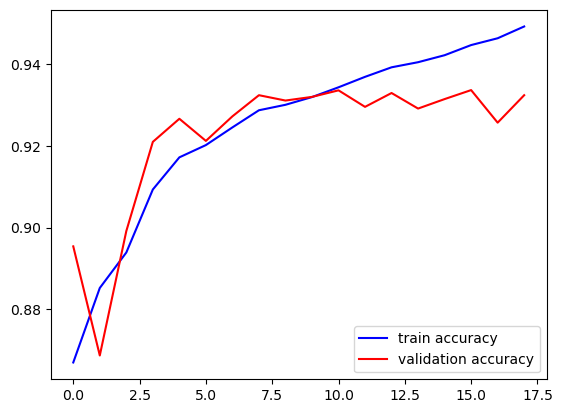

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

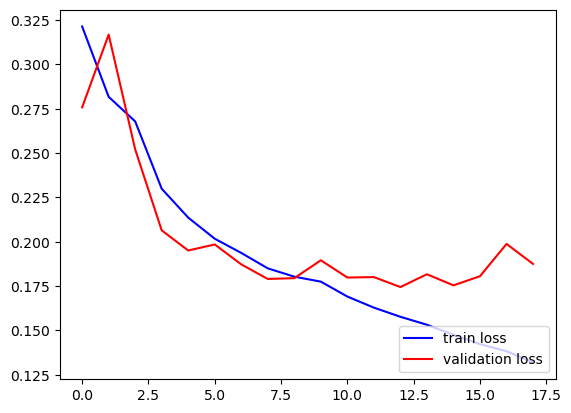

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(history_embedding.history['loss'],c='b',label='train loss')
plt.plot(history_embedding.history['val_loss'],c='r',label='validation loss')
plt.legend(loc='lower right')
plt.show()

In [35]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy  : {:.4f}'.format(accuracy))
print('loss : {:.4f}'.format(loss))

Accuracy  : 0.9299
loss : 0.1963


In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
y_pred=model.predict(X_test)
y_pred.shape

1125/1125 [==============================] - 91s 81ms/step


(36000, 2)

In [38]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [39]:
import numpy as np
y_test = y_test.to_numpy()
y_test=np.argmax(y_test,axis = 1)

In [40]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     18050
           1       0.95      0.91      0.93     17950

    accuracy                           0.93     36000
   macro avg       0.93      0.93      0.93     36000
weighted avg       0.93      0.93      0.93     36000



# lstm


In [59]:
X = dataframe['text']
y = dataframe['class']

In [60]:
from keras.preprocessing.text import Tokenizer
 # this means 10000 unique words can be taken 
tokenizer=Tokenizer(num_words= 10000,lower=True)
tokenizer.fit_on_texts(X)

In [61]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(X) # this converts texts into some numeric sequences 
X = pad_sequences(X,maxlen=200,padding='post') # this makes the length of all numeric sequences equal 
X[0]

array([6375,  739,   39,  128, 6427, 2768, 4022,  991, 1751, 5956, 2022,
       1168,   50,  312, 2407,  706,   50,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [62]:
X.shape

(120000, 200)

In [63]:
# pip install gensim
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') #100 dimension

In [64]:
import numpy as np
# from gensim.models import Word2Vec
# model = Word2Vec(sentences,min_count = 2)
# words = model.wv.index_to_key
from gensim.models import KeyedVectors
vector_size = 100
num_words = 10000
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape
for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.index_to_key:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

In [65]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.layers import Dropout

In [66]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split
y=pd.get_dummies(dataframe['class'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [69]:
# EMBEDDING_DIM = 100
# # class_num = 6
# model = Sequential()
# model.add(Embedding(input_dim = num_words,
#  output_dim = EMBEDDING_DIM,
#  input_length= X.shape[1],
#  weights = [gensim_weight_matrix],trainable = False))
# model.add(Dropout(0.2))
# model.add(Bidirectional(CuDNNLSTM(100,return_sequences=True)))
# model.add(Dropout(0.2))
# model.add(Bidirectional(CuDNNLSTM(200,return_sequences=True)))
# model.add(Dropout(0.2))
# model.add(Bidirectional(CuDNNLSTM(100,return_sequences=False)))
# model.add(Dense(3, activation = 'softmax'))
# model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')

EMBEDDING_DIM = 100
# class_num = 6
model1 = Sequential()
model1.add(Embedding(input_dim = num_words,
 output_dim = EMBEDDING_DIM,
 input_length= X.shape[1],
 weights = [gensim_weight_matrix],trainable = False))
model1.add(Dropout(0.2))
model1.add(CuDNNLSTM(100,return_sequences=True))
model1.add(Dropout(0.2))
# model.add(Bidirectional(CuDNNLSTM(200,return_sequences=True))
# model.add(Dropout(0.2))
model1.add(CuDNNLSTM(100,return_sequences=False))
model1.add(Dense(2, activation = 'softmax'))
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 100)          1000000   
                                                                 
 dropout_10 (Dropout)        (None, 200, 100)          0         
                                                                 
 cu_dnnlstm_10 (CuDNNLSTM)   (None, 200, 100)          80800     
                                                                 
 dropout_11 (Dropout)        (None, 200, 100)          0         
                                                                 
 cu_dnnlstm_11 (CuDNNLSTM)   (None, 100)               80800     
                                                                 
 dense_4 (Dense)             (None, 2)                 202       
                                                                 
Total params: 1,161,802
Trainable params: 161,802
Non-

In [70]:
#EarlyStopping and ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./lstm_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [71]:
history_embedding = model1.fit(X_train, y_train, 
                                epochs = 30, batch_size = 128, 
                                validation_data=(X_test, y_test),
                                verbose = 1, callbacks= [es, mc]  )

Epoch 1/30
656/657 [============================>.] - ETA: 0s - loss: 0.5068 - accuracy: 0.7662
Epoch 1: val_accuracy improved from -inf to 0.59906, saving model to ./lstm_model.h5
657/657 [==============================] - 34s 47ms/step - loss: 0.5068 - accuracy: 0.7662 - val_loss: 0.6465 - val_accuracy: 0.5991
Epoch 2/30
657/657 [==============================] - ETA: 0s - loss: 0.6613 - accuracy: 0.5690
Epoch 2: val_accuracy improved from 0.59906 to 0.82264, saving model to ./lstm_model.h5
657/657 [==============================] - 29s 44ms/step - loss: 0.6613 - accuracy: 0.5690 - val_loss: 0.4249 - val_accuracy: 0.8226
Epoch 3/30
656/657 [============================>.] - ETA: 0s - loss: 0.3387 - accuracy: 0.8614
Epoch 3: val_accuracy improved from 0.82264 to 0.87683, saving model to ./lstm_model.h5
657/657 [==============================] - 31s 47ms/step - loss: 0.3388 - accuracy: 0.8614 - val_loss: 0.3024 - val_accuracy: 0.8768
Epoch 4/30
656/657 [============================>.] 

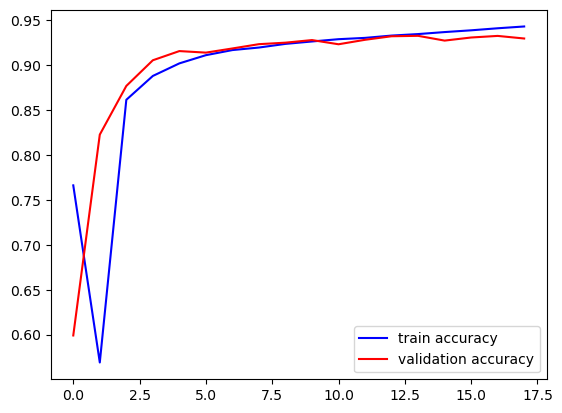

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

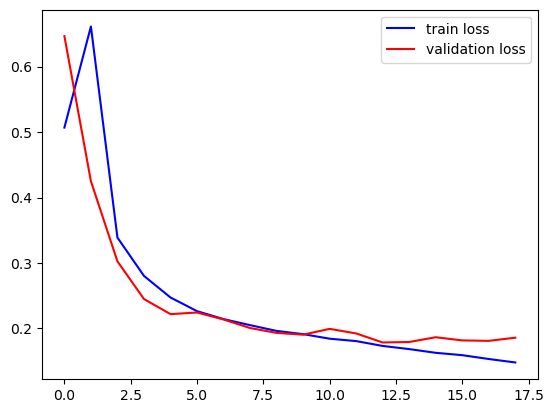

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(history_embedding.history['loss'],c='b',label='train loss')
plt.plot(history_embedding.history['val_loss'],c='r',label='validation loss')
plt.legend(loc='upper right')
plt.show()

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
y_pred=model1.predict(X_test)
y_pred.shape

1125/1125 [==============================] - 11s 10ms/step


(36000, 2)

In [76]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [77]:
import numpy as np
y_test = y_test.to_numpy()
y_test=np.argmax(y_test,axis = 1)

In [78]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     18050
           1       0.91      0.95      0.93     17950

    accuracy                           0.93     36000
   macro avg       0.93      0.93      0.93     36000
weighted avg       0.93      0.93      0.93     36000



# gru

In [79]:
X = dataframe['text']
y = dataframe['class']

In [80]:
from keras.preprocessing.text import Tokenizer
 # this means 10000 unique words can be taken 
tokenizer=Tokenizer(num_words= 10000,lower=True)
tokenizer.fit_on_texts(X)

In [81]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(X) # this converts texts into some numeric sequences 
X = pad_sequences(X,maxlen=200,padding='post') # this makes the length of all numeric sequences equal 
X[0]

array([6375,  739,   39,  128, 6427, 2768, 4022,  991, 1751, 5956, 2022,
       1168,   50,  312, 2407,  706,   50,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [82]:
X.shape

(120000, 200)

In [83]:
# pip install gensim
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') #100 dimension

In [84]:
import numpy as np
# from gensim.models import Word2Vec
# model = Word2Vec(sentences,min_count = 2)
# words = model.wv.index_to_key
from gensim.models import KeyedVectors
vector_size = 100
num_words = 10000
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape
for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.index_to_key:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

In [85]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNGRU
# keras.layers.CuDNNLSTM/
from tensorflow.keras.layers import Dropout

In [86]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split
y=pd.get_dummies(dataframe['class'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [87]:
# EMBEDDING_DIM = 100
# # class_num = 6
# model = Sequential()
# model.add(Embedding(input_dim = num_words,
#  output_dim = EMBEDDING_DIM,
#  input_length= X.shape[1],
#  weights = [gensim_weight_matrix],trainable = False))
# model.add(Dropout(0.2))
# model.add(Bidirectional(CuDNNLSTM(100,return_sequences=True)))
# model.add(Dropout(0.2))
# model.add(Bidirectional(CuDNNLSTM(200,return_sequences=True)))
# model.add(Dropout(0.2))
# model.add(Bidirectional(CuDNNLSTM(100,return_sequences=False)))
# model.add(Dense(3, activation = 'softmax'))
# model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')

EMBEDDING_DIM = 100
# class_num = 6
model2 = Sequential()
model2.add(Embedding(input_dim = num_words,
 output_dim = EMBEDDING_DIM,
 input_length= X.shape[1],
 weights = [gensim_weight_matrix],trainable = False))
model2.add(Dropout(0.2))
model2.add(CuDNNGRU(100,return_sequences=True))
model2.add(Dropout(0.2))
# model.add(Bidirectional(CuDNNLSTM(200,return_sequences=True))
# model.add(Dropout(0.2))
model2.add(CuDNNGRU(100,return_sequences=False))
model2.add(Dense(2, activation = 'softmax'))
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 200, 100)          1000000   
                                                                 
 dropout_12 (Dropout)        (None, 200, 100)          0         
                                                                 
 cu_dnngru (CuDNNGRU)        (None, 200, 100)          60600     
                                                                 
 dropout_13 (Dropout)        (None, 200, 100)          0         
                                                                 
 cu_dnngru_1 (CuDNNGRU)      (None, 100)               60600     
                                                                 
 dense_5 (Dense)             (None, 2)                 202       
                                                                 
Total params: 1,121,402
Trainable params: 121,402
Non-

In [88]:
#EarlyStopping and ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./gru_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [89]:
history_embedding = model2.fit(X_train, y_train, 
                                epochs = 30, batch_size = 128, 
                                validation_data=(X_test, y_test),
                                verbose = 1, callbacks= [es, mc]  )

Epoch 1/30
657/657 [==============================] - ETA: 0s - loss: 0.6502 - accuracy: 0.5720
Epoch 1: val_accuracy improved from -inf to 0.85828, saving model to ./gru_model.h5
657/657 [==============================] - 32s 44ms/step - loss: 0.6502 - accuracy: 0.5720 - val_loss: 0.3569 - val_accuracy: 0.8583
Epoch 2/30
657/657 [==============================] - ETA: 0s - loss: 0.2853 - accuracy: 0.8853
Epoch 2: val_accuracy improved from 0.85828 to 0.90886, saving model to ./gru_model.h5
657/657 [==============================] - 27s 41ms/step - loss: 0.2853 - accuracy: 0.8853 - val_loss: 0.2330 - val_accuracy: 0.9089
Epoch 3/30
657/657 [==============================] - ETA: 0s - loss: 0.2330 - accuracy: 0.9081
Epoch 3: val_accuracy improved from 0.90886 to 0.91369, saving model to ./gru_model.h5
657/657 [==============================] - 27s 41ms/step - loss: 0.2330 - accuracy: 0.9081 - val_loss: 0.2248 - val_accuracy: 0.9137
Epoch 4/30
656/657 [============================>.] - E

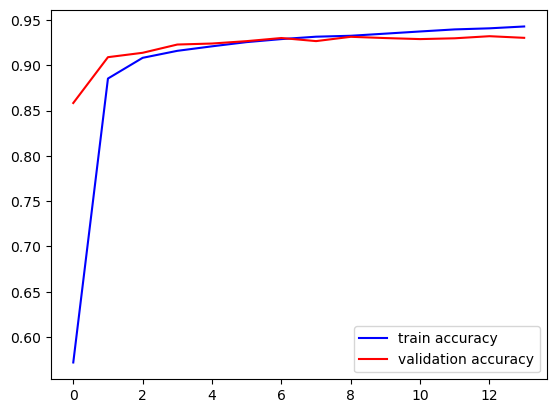

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

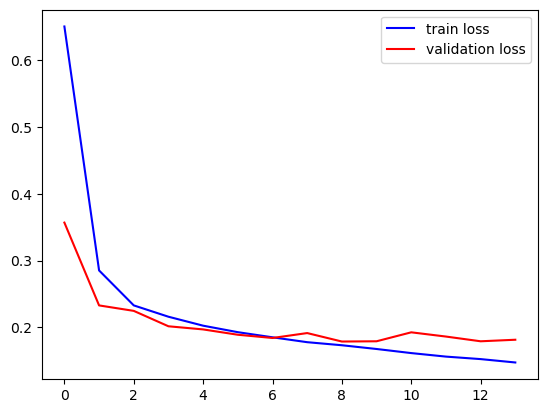

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(history_embedding.history['loss'],c='b',label='train loss')
plt.plot(history_embedding.history['val_loss'],c='r',label='validation loss')
plt.legend(loc='upper right')
plt.show()

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
y_pred=model.predict(X_test)
y_pred.shape

1125/1125 [==============================] - 11s 9ms/step


(36000, 2)

In [94]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [95]:
import numpy as np
y_test = y_test.to_numpy()
y_test=np.argmax(y_test,axis = 1)

In [96]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90     18050
           1       0.88      0.93      0.91     17950

    accuracy                           0.90     36000
   macro avg       0.90      0.90      0.90     36000
weighted avg       0.90      0.90      0.90     36000



# rnn

In [97]:
X = dataframe['text']
y = dataframe['class']

In [98]:
from keras.preprocessing.text import Tokenizer
 # this means 10000 unique words can be taken 
tokenizer=Tokenizer(num_words= 10000,lower=True)
tokenizer.fit_on_texts(X)

In [99]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(X) # this converts texts into some numeric sequences 
X = pad_sequences(X,maxlen=100,padding='post') # this makes the length of all numeric sequences equal 
X[0]

array([6375,  739,   39,  128, 6427, 2768, 4022,  991, 1751, 5956, 2022,
       1168,   50,  312, 2407,  706,   50,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [100]:
X.shape

(120000, 100)

In [101]:
# pip install gensim
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') #100 dimension

In [102]:
import numpy as np
# from gensim.models import Word2Vec
# model = Word2Vec(sentences,min_count = 2)
# words = model.wv.index_to_key
from gensim.models import KeyedVectors
vector_size = 100
num_words = 10000
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape
for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.index_to_key:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

In [103]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional,SimpleRNN 
import tensorflow
# from tensorflow.compat.v1.keras.layers import CuDNNRNN
from tensorflow.keras.layers import Dropout

In [104]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split
y=pd.get_dummies(dataframe['class'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [105]:
# EMBEDDING_DIM = 100
# # class_num = 6
# model = Sequential()
# model.add(Embedding(input_dim = num_words,
#  output_dim = EMBEDDING_DIM,
#  input_length= X.shape[1],
#  weights = [gensim_weight_matrix],trainable = False))
# model.add(Dropout(0.2))
# model.add(Bidirectional(CuDNNLSTM(100,return_sequences=True)))
# model.add(Dropout(0.2))
# model.add(Bidirectional(CuDNNLSTM(200,return_sequences=True)))
# model.add(Dropout(0.2))
# model.add(Bidirectional(CuDNNLSTM(100,return_sequences=False)))
# model.add(Dense(3, activation = 'softmax'))
# model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')

EMBEDDING_DIM = 100
# class_num = 6
model3 = Sequential()
model3.add(Embedding(input_dim = num_words,
 output_dim = EMBEDDING_DIM,
 input_length= X.shape[1],
 weights = [gensim_weight_matrix],trainable = False))
model3.add(Dropout(0.2))
model3.add(SimpleRNN (100,return_sequences=True))
model3.add(Dropout(0.4))
model3.add(SimpleRNN (200,return_sequences=True))
model3.add(Dropout(0.4))
model3.add(SimpleRNN (100,return_sequences=False))
model3.add(Dense(2, activation = 'softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 dropout_14 (Dropout)        (None, 100, 100)          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 100)          20100     
                                                                 
 dropout_15 (Dropout)        (None, 100, 100)          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100, 200)          60200     
                                                                 
 dropout_16 (Dropout)        (None, 100, 200)          0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 100)              

In [106]:
#EarlyStopping and ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./rnn_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [107]:
history_embedding = model3.fit(X_train, y_train, 
                                epochs = 30, batch_size = 128, 
                                validation_data=(X_test, y_test),
                                verbose = 1, callbacks= [es, mc]  )

Epoch 1/30
750/750 [==============================] - ETA: 0s - loss: 0.6377 - accuracy: 0.6192
Epoch 1: val_accuracy improved from -inf to 0.60721, saving model to ./rnn_model.h5
750/750 [==============================] - 155s 201ms/step - loss: 0.6377 - accuracy: 0.6192 - val_loss: 0.6321 - val_accuracy: 0.6072
Epoch 2/30
750/750 [==============================] - ETA: 0s - loss: 0.6101 - accuracy: 0.6325
Epoch 2: val_accuracy improved from 0.60721 to 0.61696, saving model to ./rnn_model.h5
750/750 [==============================] - 151s 202ms/step - loss: 0.6101 - accuracy: 0.6325 - val_loss: 0.6382 - val_accuracy: 0.6170
Epoch 3/30
750/750 [==============================] - ETA: 0s - loss: 0.6519 - accuracy: 0.5970
Epoch 3: val_accuracy did not improve from 0.61696
750/750 [==============================] - 151s 202ms/step - loss: 0.6519 - accuracy: 0.5970 - val_loss: 0.6779 - val_accuracy: 0.4997
Epoch 4/30
750/750 [==============================] - ETA: 0s - loss: 0.6432 - accura

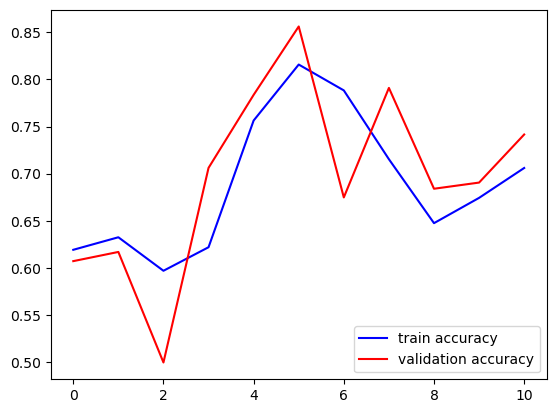

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

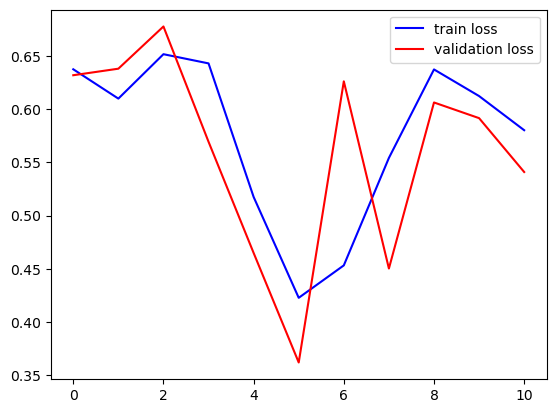

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(history_embedding.history['loss'],c='b',label='train loss')
plt.plot(history_embedding.history['val_loss'],c='r',label='validation loss')
plt.legend(loc='upper right')
plt.show()

In [110]:
from sklearn.metrics import classification_report, confusion_matrix

In [111]:
y_pred=model.predict(X_test)
y_pred.shape

750/750 [==============================] - 5s 6ms/step


(24000, 2)

In [112]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [113]:
import numpy as np
y_test = y_test.to_numpy()
y_test=np.argmax(y_test,axis = 1)

In [114]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     11942
           1       0.76      0.98      0.86     12058

    accuracy                           0.84     24000
   macro avg       0.87      0.84      0.83     24000
weighted avg       0.87      0.84      0.83     24000



In [72]:
df = dataframe.tail(1000)
suicide = df[df['class']=='suicide']
non_suicide = df[df['class']== 'non-suicide']
suicide = suicide.head(100)
non_suicide = non_suicide.head(100)
df = pd.concat([suicide,non_suicide])
df.to_csv('./checking_points.csv')

# Bidirectional_200_words

In [73]:
X = dataframe['text']
Y = dataframe['class']

In [74]:
from keras.preprocessing.text import Tokenizer
 # this means 10000 unique words can be taken 
tokenizer=Tokenizer(num_words= 10000,lower=True)
tokenizer.fit_on_texts(X)

In [75]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(X) # this converts texts into some numeric sequences 
X = pad_sequences(X,maxlen=200,padding='post') # this makes the length of all numeric sequences equal 
X[0]

array([ 413,  538,  926,    1,   52,  538,   23,  667,  769,  228,    1,
        197,  659,  387,   16,  100,  353,  926,   55,    1,  179,   16,
         26,  161, 3249,    4,  170,    1,   50,    1,    6,   80,   12,
        926,  650,   39,   71,   89,    1,    1,  301,  416,  153,  310,
          1,   32,  538,    1,    2,  172,  586,  667,  273,    5, 1672,
          1,  296,  104,   16,    1,   92,    2,   71,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [76]:
X.shape

(100000, 200)

In [77]:
# pip install gensim
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') #100 dimension

In [78]:
import numpy as np
# from gensim.models import Word2Vec
# model = Word2Vec(sentences,min_count = 2)
# words = model.wv.index_to_key
from gensim.models import KeyedVectors
vector_size = 100
num_words = 10000
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape
for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.index_to_key:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

In [79]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.layers import Dropout

In [80]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split
y=pd.get_dummies(dataframe['class'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state= 42)

In [81]:
EMBEDDING_DIM = 100
# class_num = 6
model = Sequential()
model.add(Embedding(input_dim = num_words,
 output_dim = EMBEDDING_DIM,
 input_length= X.shape[1],
 weights = [gensim_weight_matrix],trainable = False))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(100,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(200,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(100,return_sequences=False)))
model.add(Dense(2, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [82]:
#EarlyStopping and ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./bidirectional_lstm_200_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [83]:
history_embedding = model.fit(X_train, y_train, 
                                epochs = 30, batch_size = 128, 
                                validation_data=(X_val, y_val),
                                verbose = 1, callbacks= [es, mc]  )

Epoch 1/30
438/438 [==============================] - ETA: 0s - loss: 0.3246 - accuracy: 0.8650
Epoch 1: val_accuracy improved from -inf to 0.88929, saving model to ./bidirectional_lstm_200_model.h5
438/438 [==============================] - 78s 164ms/step - loss: 0.3246 - accuracy: 0.8650 - val_loss: 0.2779 - val_accuracy: 0.8893
Epoch 2/30
438/438 [==============================] - ETA: 0s - loss: 0.2662 - accuracy: 0.8941
Epoch 2: val_accuracy did not improve from 0.88929
438/438 [==============================] - 70s 160ms/step - loss: 0.2662 - accuracy: 0.8941 - val_loss: 0.3168 - val_accuracy: 0.8812
Epoch 3/30
438/438 [==============================] - ETA: 0s - loss: 0.2465 - accuracy: 0.9036
Epoch 3: val_accuracy improved from 0.88929 to 0.91336, saving model to ./bidirectional_lstm_200_model.h5
438/438 [==============================] - 71s 162ms/step - loss: 0.2465 - accuracy: 0.9036 - val_loss: 0.2228 - val_accuracy: 0.9134
Epoch 4/30
438/438 [==============================

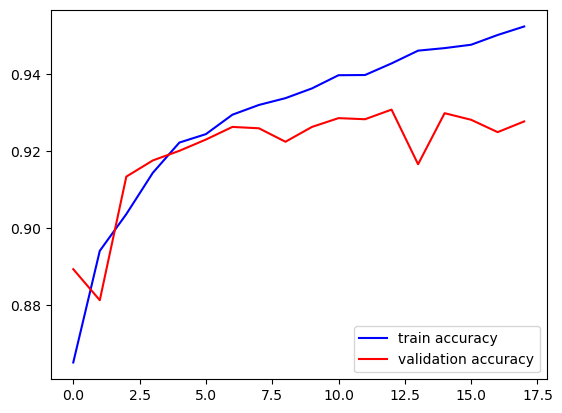

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

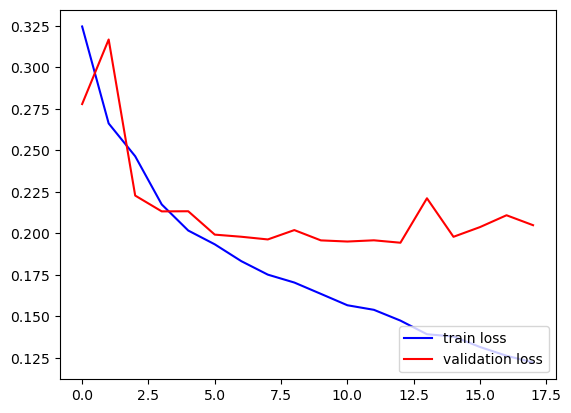

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(history_embedding.history['loss'],c='b',label='train loss')
plt.plot(history_embedding.history['val_loss'],c='r',label='validation loss')
plt.legend(loc='lower right')
plt.show()